Párrafo 1: He had grey hair, a serious look, the tanned skin of a worker and the pensive face of a philosopher. He wore a long frock-coat buttoned to the neck and a wide-brimmed hat. He lived alone. He spoke to few people. As his fortune grew, he seemed to take advantage of his free time to cultivate his spirit. It was noticeable that his way of speaking had become more refined, more select, softer. 
  Polaridad: 0.10952380952380954
  Subjetividad: 0.43809523809523804

Párrafo 2: He had prodigious strength. He offered his help to whoever needed it; he would lift a horse, unblock a wheel, stop a runaway bull by the horns. He always carried his pockets full of small change when he left home, and brought them back empty when he returned. When he saw a funeral in the church he would go in and place himself among the grieving friends, among the mourning families. 
  Polaridad: -5.551115123125783e-18
  Subjetividad: 0.29000000000000004

Párrafo 3: In the evening he would enter empty houses a

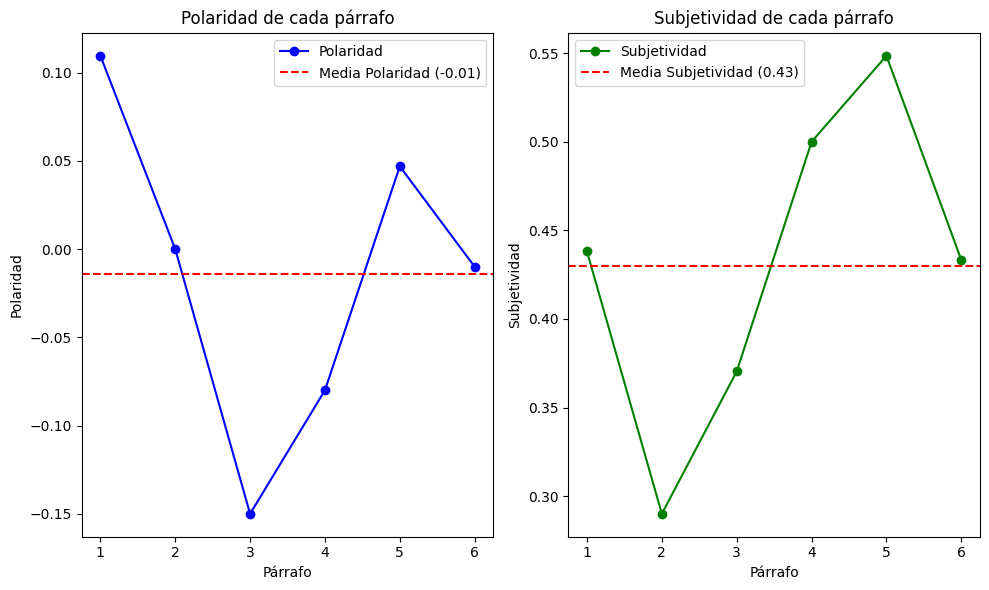

In [1]:
import nltk
from deep_translator import GoogleTranslator
import textblob.download_corpora as download_corpora  # Importamos el módulo
import numpy as np  # Usaremos NumPy para los cálculos de media y desviación estándar
import matplotlib.pyplot as plt  # Importamos Matplotlib para los gráficos

def main():
    
    from textblob import TextBlob

    texto = """
    Tenía los cabellos grises, la mirada seria, la piel bronceada de un obrero y el rostro pensativo de un filósofo. Usaba una larga levita abotonada hasta el cuello y un sombrero de ala ancha. Vivía solo. Hablaba con poca gente. A medida que su fortuna crecía, parecía que aprovechaba su tiempo libre para cultivar su espíritu. Se notaba que su modo de hablar se había ido haciendo más fino, más escogido, más suave.
    Tenía una fuerza prodigiosa. Ofrecía su ayuda a quien lo necesitaba; levantaba un caballo, desatrancaba una rueda, detenía por los cuernos un toro escapado. Llevaba siempre los bolsillos llenos de monedas menudas al salir de casa, y los traía vacíos al volver. Cuando veía un funeral en la iglesia entraba y se ponía entre los amigos afligidos, entre las familias enlutadas.
    Entraba por la tarde en las casas sin moradores, y subía furtivamente las escaleras. Un pobre diablo al volver a su chiribitil, veía que su puerta había sido abierta, algunas veces forzada en su ausencia. El pobre hombre se alarmaba y pensaba: "Algún malhechor habrá entrado aquí". Pero lo primero que veía era alguna moneda de oro olvidada sobre un mueble. El malhechor que había entrado era el señor Magdalena.
    Poco a poco, y con el tiempo, se fueron disipando todas las oposiciones. El respeto por el señor Magdalena llegó a ser unánime, cordial, y hubo un momento, en 1821, en que estas palabras, "el señor alcalde", se pronunciaban en M. casi con el mismo acento que estas otras, "el señor obispo", eran pronunciadas en D. en 1815. Llegaba gente de lejos a consultar al señor Magdalena. Terminaba las diferencias, suspendía los pleitos y reconciliaba a los enemigos.
    Muchas veces, cuando el señor Magdalena pasaba por una calle, tranquilo, afectuoso, rodeado de las bendiciones de todos, un hombre de alta estatura, vestido con una levita gris oscuro, armado de un grueso bastón y con un sombrero de copa achatada en la cabeza, se volvía bruscamente a mirarlo y lo seguía con la vista hasta que desaparecía; entonces cruzaba los brazos, sacudiendo lentamente la cabeza y levantando los labios hasta la nariz, especie de gesto significativo que podía traducirse por: "¿Pero quién es ese hombre? Estoy seguro de haberlo visto en alguna parte. Lo que es a mí no me engaña".
    Era estoico, austero, soñador, humilde y altanero como los fanáticos. Toda su vida se compendiaba en estas dos palabras: velar y vigilar. ¡Desgraciado del que caía en sus manos! Hubiera sido capaz de prender a su padre al escaparse del presidio y denunciar a su madre por no acatar la ley; y lo hubiera hecho con esa especie de satisfacción interior que da la virtud. Añádase que llevaba una vida de privaciones, de aislamiento, de abnegación, de castidad, sin la más mínima distracción.
    """
    
    # Traducir el texto de español a inglés
    texto_en = GoogleTranslator(source='es', target='en').translate(texto)
    
    # Dividir el texto en párrafos
    parrafos = texto_en.split('\n')
    
    polaridades = []
    subjetividades = []
    
    # Procesar cada párrafo
    for idx, parrafo in enumerate(parrafos, 1):
        
        # Crear un objeto TextBlob para cada párrafo
        blob = TextBlob(parrafo)
        polaridad = blob.sentiment.polarity
        subjetividad = blob.sentiment.subjectivity
        
        # Guardar los resultados en las listas correspondientes
        polaridades.append(polaridad)
        subjetividades.append(subjetividad)
        
        print(f"Párrafo {idx}: {parrafo}")
        print(f"  Polaridad: {polaridad}")
        print(f"  Subjetividad: {subjetividad}\n")
    
    # Calcular las métricas globales
    if polaridades and subjetividades:
        # Media y desviación estándar para polaridad
        media_polaridad = np.mean(polaridades)
        desviacion_polaridad = np.std(polaridades)
        
        # Media y desviación estándar para subjetividad
        media_subjetividad = np.mean(subjetividades)
        desviacion_subjetividad = np.std(subjetividades)
        
        # Mostrar las métricas globales
        print("Métricas globales:")
        print(f"  Media de polaridad: {media_polaridad}")
        print(f"  Desviación estándar de polaridad: {desviacion_polaridad}")
        print(f"  Media de subjetividad: {media_subjetividad}")
        print(f"  Desviación estándar de subjetividad: {desviacion_subjetividad}")
        
        # Graficar las polaridades y subjetividades de los párrafos
        plt.figure(figsize=(10, 6))

        # Gráfico de polaridad
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(polaridades) + 1), polaridades, marker='o', color='b', label='Polaridad')
        plt.axhline(y=media_polaridad, color='r', linestyle='--', label=f'Media Polaridad ({media_polaridad:.2f})')
        plt.title('Polaridad de cada párrafo')
        plt.xlabel('Párrafo')
        plt.ylabel('Polaridad')
        plt.legend()
        
        # Gráfico de subjetividad
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(subjetividades) + 1), subjetividades, marker='o', color='g', label='Subjetividad')
        plt.axhline(y=media_subjetividad, color='r', linestyle='--', label=f'Media Subjetividad ({media_subjetividad:.2f})')
        plt.title('Subjetividad de cada párrafo')
        plt.xlabel('Párrafo')
        plt.ylabel('Subjetividad')
        plt.legend()
        
        # Mostrar el gráfico
        plt.tight_layout()
        plt.show()
        
    else:
        print("No se pudieron calcular las métricas globales debido a la falta de párrafos procesados.")

if __name__ == "__main__":
    main()
